Data Exploration
Project description
What we want

Brief description of the dataset

In [1]:
from data_utils import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import IPython.display as ipd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
#import librosa

Download the data

The cell below will download the necessary data and extract the files into the folder data/

In [2]:
data_path = 'data/raw_data'
download_data('http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz', data_path, extract=True)

The dataset is organized into 31 folders containing the audio files for each word. There are 20 core words ("Yes", "No", "Up", "Down", "Left", "Right", "On", "Off", "Stop", "Go", "Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", and "Nine"), and 10 auxiliary words ("Bed", "Bird", "Cat", "Dog", "Happy", "House", "Marvin", "Sheila", "Tree", and "Wow") to help to distinguish between unrecognized  words. There is also included a set of files with background noise.

In [17]:
all_words = [ word for word in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, word)) ]
#remove _background_noise_ folder from words list
all_words.remove('_background_noise_')
print(f'Words in dataset: {len(all_words)}')
print(all_words)

Words in dataset: 30
['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [18]:
TRAIN_WORDS = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
CORE_WORDS = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [19]:
stop_dir = os.path.join(data_path,'down')
ipd.Audio(os.path.join(stop_dir,os.listdir(stop_dir)[0])) # load a local WAV file

In [20]:
wav_files = {'label':[], 'file':[]}
for word in all_words:
    wavs = [ file for file in os.listdir(os.path.join(data_path, word)) if file.endswith('.wav')]
    for wav in wavs:
        wav_files['label'].append(word)
        wav_files['file'].append(wav)
    print(f'{word}: {len(wavs)} wav files')
print(f'Total number of files:{len(wav_files["file"])}')

bed: 1713 wav files
bird: 1731 wav files
cat: 1733 wav files
dog: 1746 wav files
down: 2359 wav files
eight: 2352 wav files
five: 2357 wav files
four: 2372 wav files
go: 2372 wav files
happy: 1742 wav files
house: 1750 wav files
left: 2353 wav files
marvin: 1746 wav files
nine: 2364 wav files
no: 2375 wav files
off: 2357 wav files
on: 2367 wav files
one: 2370 wav files
right: 2367 wav files
seven: 2377 wav files
sheila: 1734 wav files
six: 2369 wav files
stop: 2380 wav files
three: 2356 wav files
tree: 1733 wav files
two: 2373 wav files
up: 2375 wav files
wow: 1745 wav files
yes: 2377 wav files
zero: 2376 wav files
Total number of files:64721


In [21]:
files_df = pd.DataFrame(wav_files)
files_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64721 entries, 0 to 64720
Data columns (total 2 columns):
label    64721 non-null object
file     64721 non-null object
dtypes: object(2)
memory usage: 1011.4+ KB


In [22]:
files_df.head()

,label,file
0,bed,00176480_nohash_0.wav
1,bed,004ae714_nohash_0.wav
2,bed,004ae714_nohash_1.wav
3,bed,00f0204f_nohash_0.wav
4,bed,00f0204f_nohash_1.wav


In [23]:
files_df['core_word'] = files_df['label'].isin(CORE_WORDS)
files_df.head()

,label,file,core_word
0,bed,00176480_nohash_0.wav,False
1,bed,004ae714_nohash_0.wav,False
2,bed,004ae714_nohash_1.wav,False
3,bed,00f0204f_nohash_0.wav,False
4,bed,00f0204f_nohash_1.wav,False


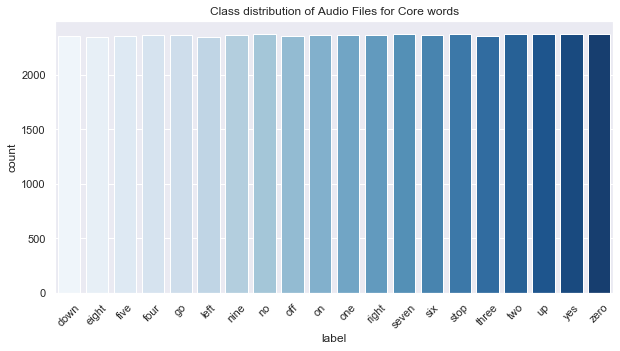

In [24]:
plt.subplots(figsize=(10,5))
chart = sns.countplot(
    data=files_df[files_df['core_word']],
    x='label',
    palette='Blues'
)
chart.set_title('Class distribution of Audio Files for Core words')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    fontweight='light'
)
print('')

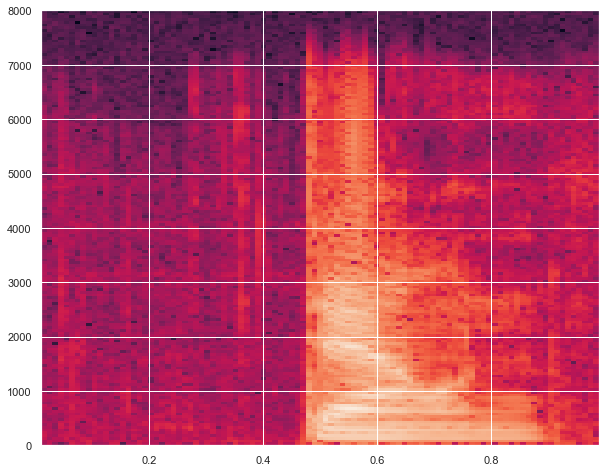

In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

filename = os.path.join(stop_dir,os.listdir(stop_dir)[0])
sample_rate, samples = wavfile.read(filename)
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])

In [15]:
spectrogram

array([[-5.6012492e+00, -4.9613142e+00, -3.3403924e+00, ...,
        -1.0608857e+01, -1.0772937e+01, -1.1749670e+01],
       [-3.7761774e+00, -3.8298721e+00, -5.8250928e+00, ...,
        -1.2796091e+01, -1.2835159e+01, -1.3974379e+01],
       [-7.0478592e+00, -4.4703035e+00, -4.2677908e+00, ...,
        -1.2741484e+01, -1.4045991e+01, -1.3157676e+01],
       ...,
       [-1.3345208e+00, -1.0172670e+00, -2.9087037e-01, ...,
        -1.1057109e+01, -1.1224584e+01, -1.2524642e+01],
       [-1.9651233e-01, -1.0351470e-01,  8.8200271e-03, ...,
        -1.1792694e+01, -1.1085860e+01, -1.2129609e+01],
       [-2.8539586e+00,  4.3983835e-01, -3.3925459e-01, ...,
        -1.1185751e+01, -1.3962087e+01, -1.3766268e+01]], dtype=float32)

Lets add sample rate and number of samplesn for each file
This could take some time, so be patient.

In [35]:
def get_full_path(data_path, word, filename):
    return os.path.join(data_path, word, filename)

def get_number_of_samples(filename):
    sample_rate, samples = wavfile.read(filename)
    return len(samples)

files_df['number_of_samples']=files_df.apply(lambda row: get_number_of_samples(get_full_path(data_path, row['label'], row['file'])) , axis=1) 

In [41]:
files_df.head()

,label,file,core_word,number_of_samples
0,bed,00176480_nohash_0.wav,False,16000
1,bed,004ae714_nohash_0.wav,False,16000
2,bed,004ae714_nohash_1.wav,False,14861
3,bed,00f0204f_nohash_0.wav,False,16000
4,bed,00f0204f_nohash_1.wav,False,16000


In [42]:
files_df['number_of_samples'][files_df['number_of_samples']!=16000].describe()

count     6469.000000
mean     13531.994744
std       1892.299935
min       5945.000000
25%      12288.000000
50%      14118.000000
75%      15019.000000
max      15976.000000
Name: number_of_samples, dtype: float64

We have to fill all that samples with zero to get all inputs with the same size (16000 samples or 1 second)